In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Load the data
crime_data = pd.read_csv('/content/crime_data.csv')

In [ ]:
# Display the first few rows of the dataset
print(crime_data.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [ ]:
# Exclude non-numeric column
crime_data_numeric = crime_data.drop('Unnamed: 0', axis=1)

In [ ]:
# Standardize the data
scaler = StandardScaler()
crime_data_scaled = scaler.fit_transform(crime_data_numeric)

In [ ]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

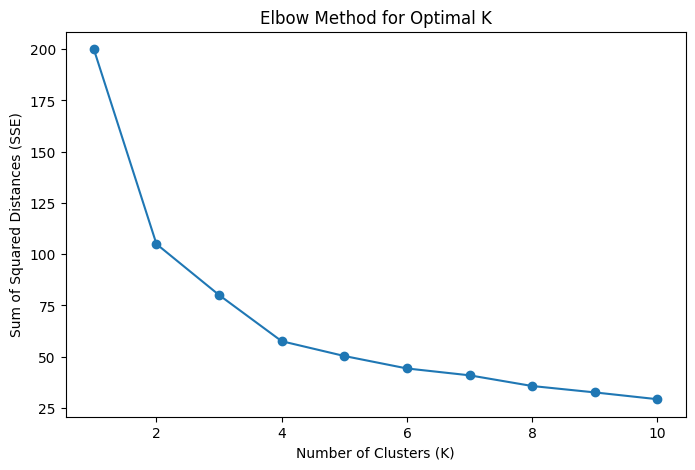

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

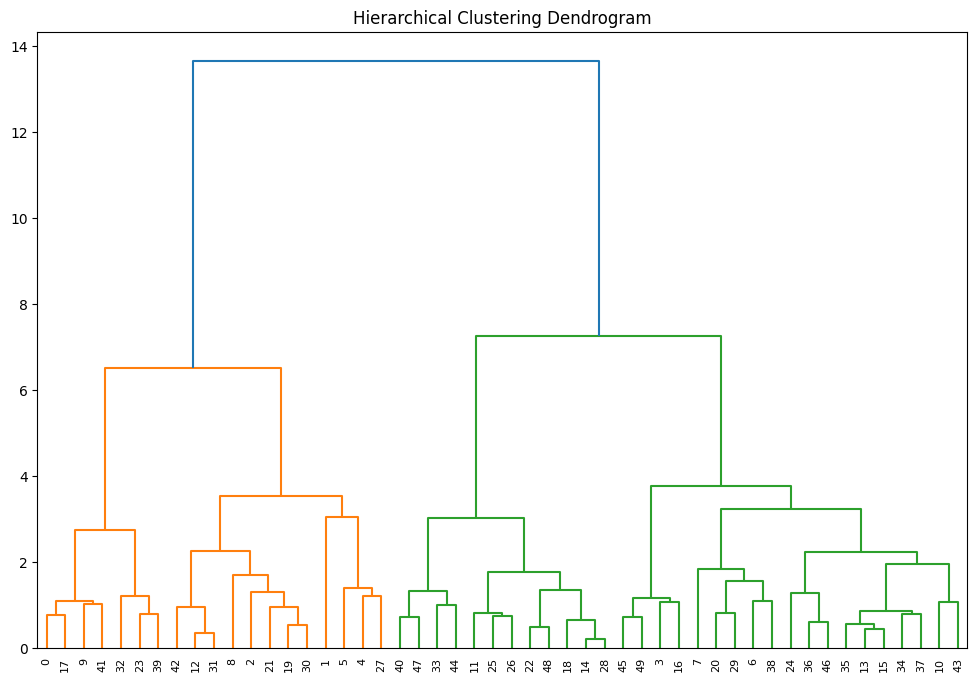

In [ ]:
# Hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram(linkage(crime_data_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
# Based on the dendrogram, you can visually identify the number of clusters

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
crime_data['KMeans_Cluster'] = kmeans.fit_predict(crime_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
crime_data['DBSCAN_Cluster'] = dbscan.fit_predict(crime_data_scaled)

In [ ]:
# Display the results
print("Number of clusters formed by KMeans:", len(crime_data['KMeans_Cluster'].unique()))
print("Number of clusters formed by DBSCAN:", len(crime_data['DBSCAN_Cluster'].unique()))

Number of clusters formed by KMeans: 3
Number of clusters formed by DBSCAN: 3


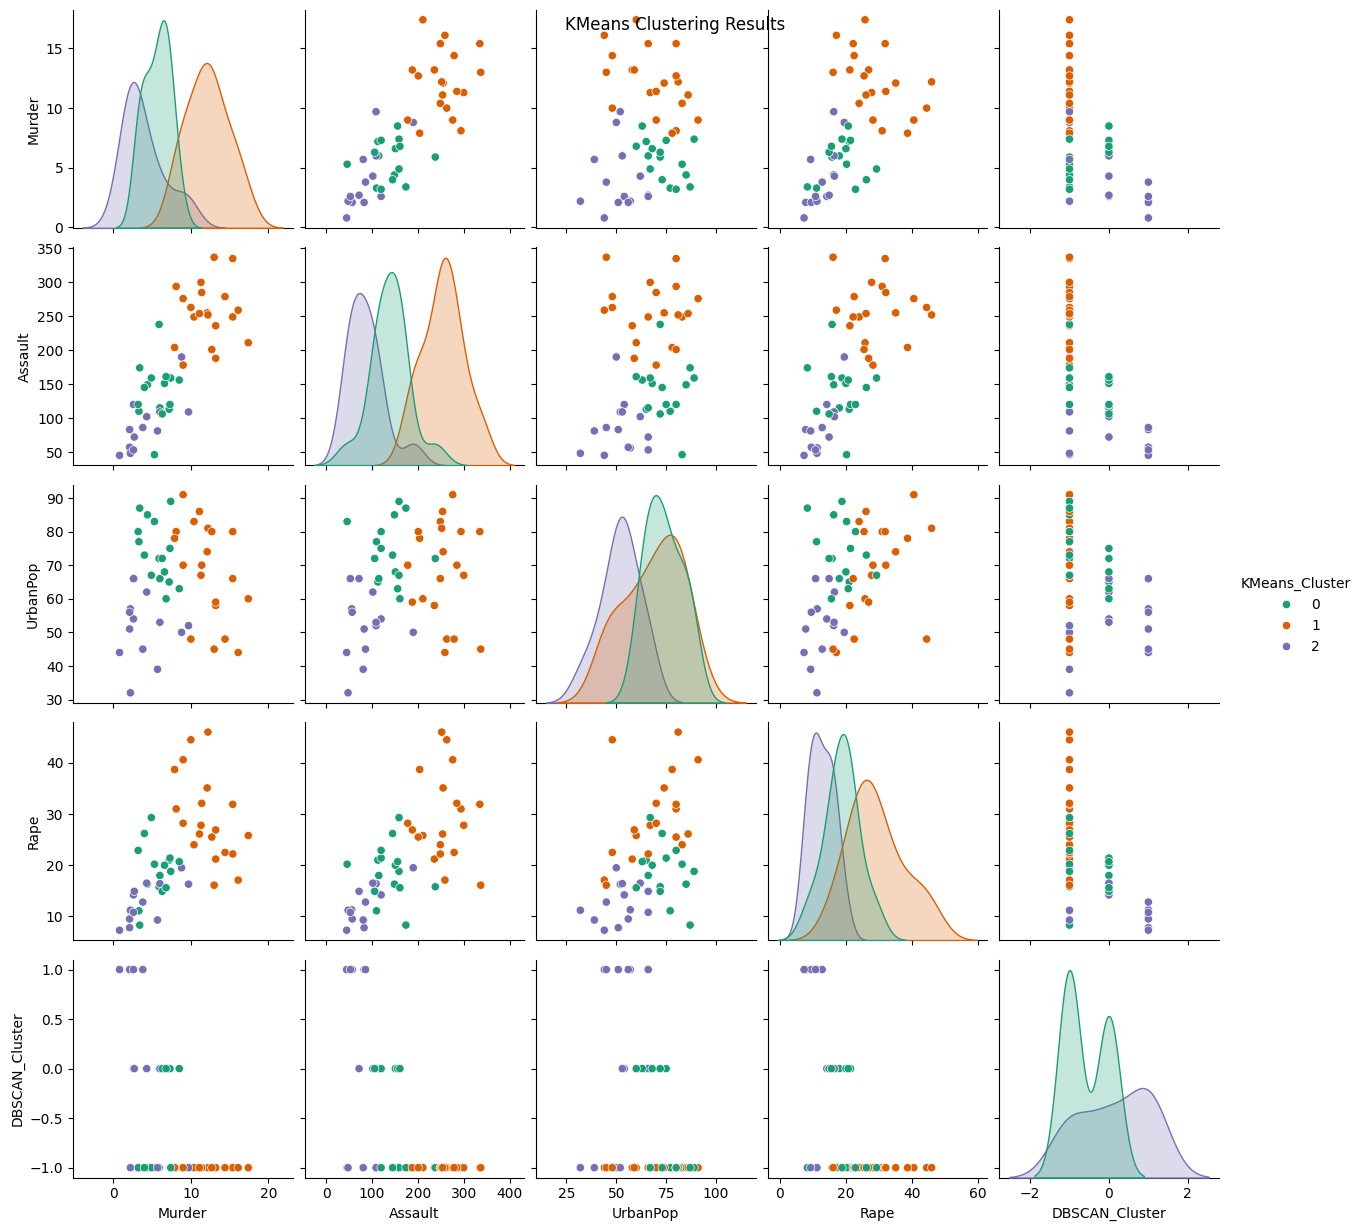

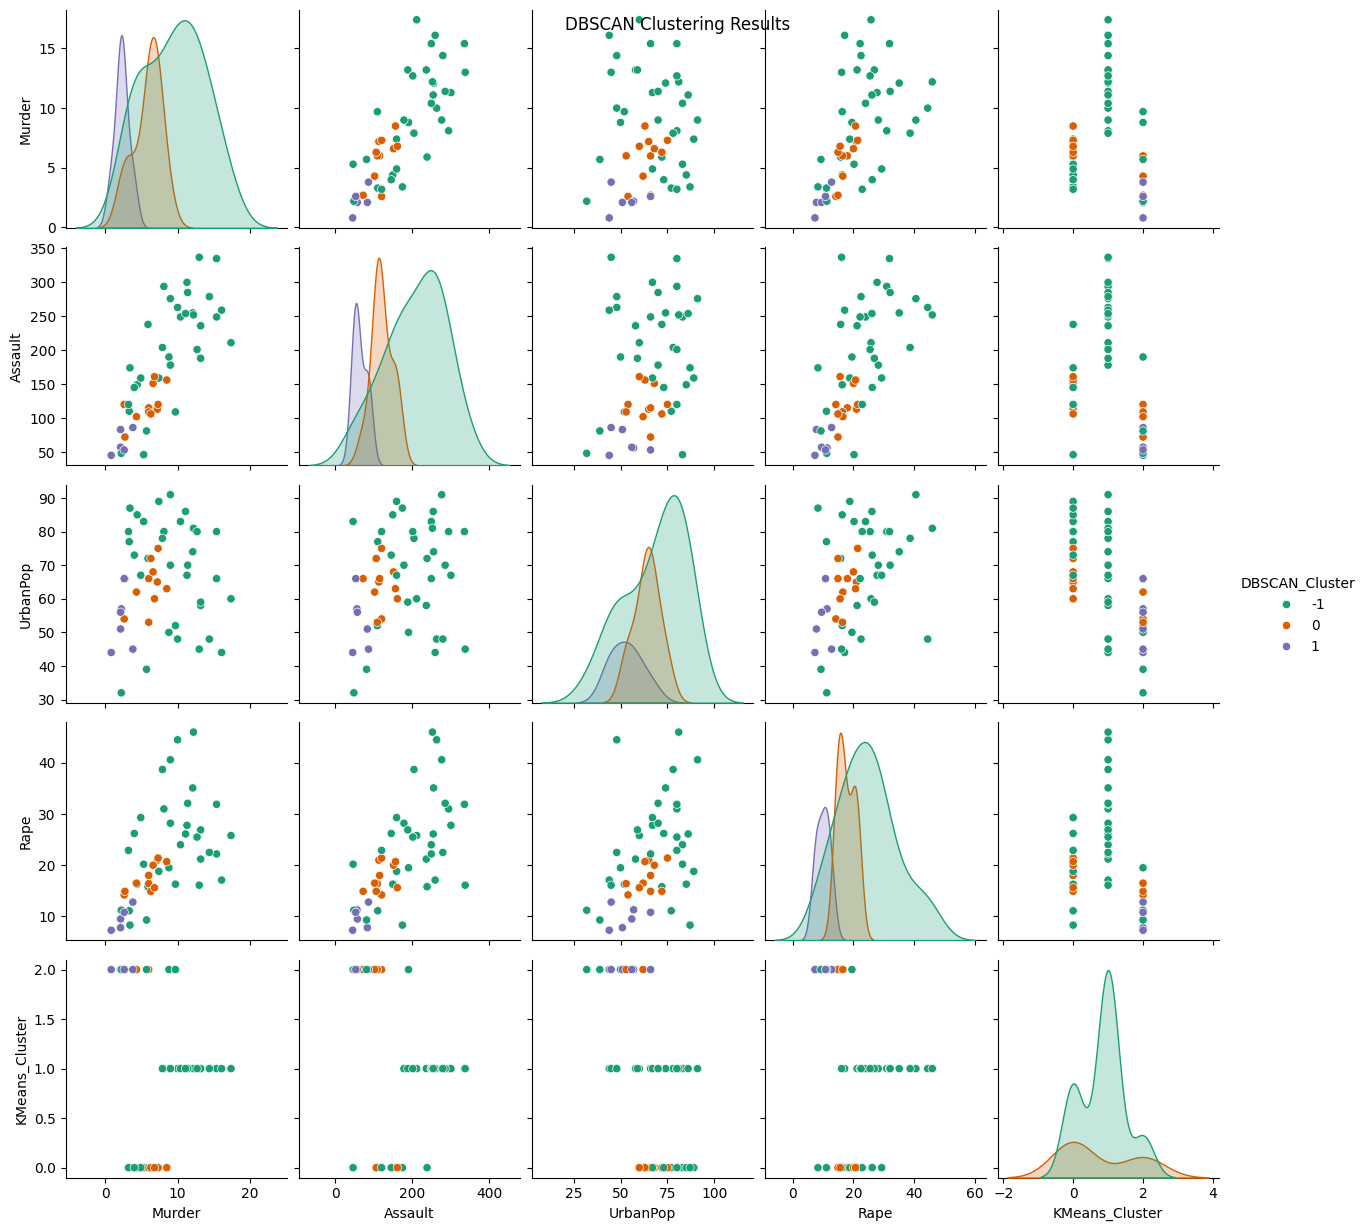

In [ ]:
# Visualize the clusters
sns.pairplot(crime_data, hue='KMeans_Cluster', diag_kind='kde', palette='Dark2')
plt.suptitle('KMeans Clustering Results')
plt.show()

sns.pairplot(crime_data, hue='DBSCAN_Cluster', diag_kind='kde', palette='Dark2')
plt.suptitle('DBSCAN Clustering Results')
plt.show()